In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

# 1. tensorflow v2.xx에서 v1 사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화 하고 v1을 활성화
# 두 번 실행 시 경고메세지 사라짐
import numpy as np
import pandas as pd

## Tensorflow
 - 그래프 정의 (tensor객체의 흐름)
 - sess = tf.Session()을 실행
 - sess.run()을 통해 변수값을 확인할 수 있음

In [8]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')  # tensor객체 정의(tf.constant():상수)
sess  = tf.Session()                      # tensor객체 활성화(값이 들어감)
print(sess.run(node1))
print(sess.run(node1).decode())  # b'' 제거

b'Hello, Tensorflow'
Hello, Tensorflow


In [20]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess  = tf.Session()
print(sess.run([node1, node2, node3]))
print(node1, node2, node3, sep='\n')

[10.0, 20.0, 30.0]
Tensor("Const_26:0", shape=(), dtype=float16)
Tensor("Const_27:0", shape=(), dtype=float16)
Tensor("Add_11:0", shape=(), dtype=float16)


In [21]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1, 2, 3]),  # 기본적으로 np.array로 들어감
                    dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)  # tf.cast() : 형변환
sess  = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [22]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1, 2, 3, 4])
m    = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)  # data가 정수이므로 결과값도 정수로 출력됨

2

In [23]:
data = np.array([1., 2., 3., 4.])
m    = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)  # data가 실수이므로 결과값도 실수로 출력됨

2.5

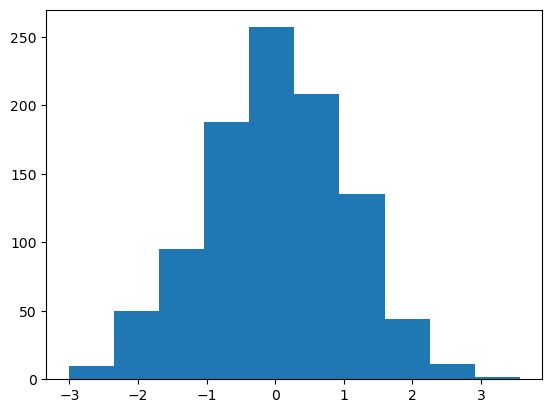

In [28]:
# tf.random_normal([size]) : 평균이 0이고, 표준편차가 1인 난수 size개 발생. 난수 갯수 : 독립변수 갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000])  # np.random.normal()과 같음  # 정규분포 난수
sess   = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [58]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1, 2, 3])  # 독립변수  #     ┌(W:weight)
y = np.array([1, 2, 3])  # 종속변수  # y = 1*x + 0
                         #                      └(b:bias)

# weight와 bias 변수 설정 (처음에는 랜덤값으로 셋팅 후, 학습과정에서 변경)
# tf.Variable() : 변수
W = tf.Variable(tf.random.normal([1]), name='weight')  # 출력  # W라는 node  # 독립변수가 1개 이므로 W값도 1개가 필요함
b = tf.Variable(tf.random.normal([1]), name='bias')    # 입력  # b라는 node  # layer가 하나씩 지나갈 때마다

# Hypothesis : 결과는 넘파이 배열(array)
H = W*x + b  # H라는 node

# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))  # 예측치-실측값의 제곱  # 값이 작아지는 방향으로 학습시키기  # W와 b값에 따라서 cost값이 달라짐

'''
학습 목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차 함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)  # 미분값에 대해 음수와 양수인지를 판단하고 ±0.01만큼 W와 b값을 조정
train     = optimizer.minimize(cost)  # train을 구동하면 cost값과 H값이 계산됨

# Session 생성 : 그래프 활성화
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())  # 임의의 W, b값
# sess.run([W, b])

# 6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])  # train은 출력하지 않음
    if step%300 == 0:  # 300번에 1번
        print('{}번째 cost : {}, W : {}, b : {}'.format(step, cost_val, W_val, b_val))

0번째 cost : 0.15800689160823822, W : [0.7898491], b : [0.752326]
300번째 cost : 0.017040040343999863, W : [0.8487533], b : [0.34381947]
600번째 cost : 0.004020766355097294, W : [0.9265308], b : [0.16701272]
900번째 cost : 0.0009487375500611961, W : [0.96431184], b : [0.08112752]
1200번째 cost : 0.00022386225464288145, W : [0.98266435], b : [0.03940806]
1500번째 cost : 5.282170241116546e-05, W : [0.9915792], b : [0.01914254]
1800번째 cost : 1.246370084118098e-05, W : [0.9959095], b : [0.00929863]
2100번째 cost : 2.941155116786831e-06, W : [0.99801296], b : [0.004517]
2400번째 cost : 6.940542789379833e-07, W : [0.99903464], b : [0.0021943]
2700번째 cost : 1.6391470580856549e-07, W : [0.9995308], b : [0.00106637]
3000번째 cost : 3.877282495068357e-08, W : [0.9997717], b : [0.00051863]
3300번째 cost : 9.194106809218283e-09, W : [0.9998889], b : [0.00025256]
3600번째 cost : 2.1932911042910064e-09, W : [0.99994564], b : [0.00012321]
3900번째 cost : 5.282664861105957e-10, W : [0.9999732], b : [6.050364e-05]
4200번째 cost

In [40]:
# 최종적으로 나온 회귀식 도출 :  H = W*x + b
sess.run([W, b])

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [41]:
W_, b_ = sess.run([W, b])
W_, b_

(array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32))

In [42]:
print('최종 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종 회귀식 : H = 0.9999977350234985*x + 4.490227638598299e-06


In [45]:
# 예측값 
def to_predict(x):
    return W_[0]*x + b_[0]
to_predict(3)

2.999997695298134

## 2.2 predict을 하기 위한 placeholder 이용
 - placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [59]:
a    = tf.placeholder(tf.float16)  # 할당받을 데이터의 타입 지정(값 없음)
b    = tf.placeholder(tf.float16)
ab   = tf.add(a, b)
sess = tf.Session()
# sess.run(a)  # a에 값이 없으므로 에러 발생
sess.run([a, b, ab], feed_dict={a : 10, b : 20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [60]:
sess.run(ab, feed_dict={a : np.array([1, 2, 3]), b : np.array([1, 2, 3])})

array([2., 4., 6.], dtype=float16)

In [61]:
# data set : (H = 2x + 1)이 되도록 세팅
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정(x:독립변수, y:종속변수)
x = tf.placeholder(dtype=tf.float32)  # cost를 실수로 받기 위해 입력받을 값도 실수로 받아옴
y = tf.placeholder(dtype=tf.float32)

# weight & bias 변수 설정
# tf.random_normal([size]) : 평균이 0이고, 표준편차가 1인 난수 size개 발생. 난수 갯수 : 독립변수 갯수
W = tf.Variable(tf.random.normal([1]), name='weight')  # x_data에 따라 2에 수렴해야 함
b = tf.Variable(tf.random.normal([1]), name='bias')    # y_data에 따라 1에 수렴해야 함

# Hypothesis (가설:예측값)
H = W*x + b

# cost function == loss function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# train     = optimizer.minimize(cost)
train     = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

# session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 6000번
for step in range(10000):  # 0부터 5999번
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x : x_data, y : y_data})
    if step%300 == 0:
        print('{}/6000번째 cost : {}, W : {}, b : {}'.format(step+1, cost_val, W_val, b_val))

1/6000번째 cost : 122.65675354003906, W : [-0.2131424], b : [0.3405667]
301/6000번째 cost : 0.011898989789187908, W : [2.0372853], b : [0.8006818]
601/6000번째 cost : 0.008410715498030186, W : [2.031352], b : [0.83242637]
901/6000번째 cost : 0.005945051088929176, W : [2.026359], b : [0.8591145]
1201/6000번째 cost : 0.004202197305858135, W : [2.0221612], b : [0.88155204]
1501/6000번째 cost : 0.0029703343752771616, W : [2.0186322], b : [0.9004156]
1801/6000번째 cost : 0.002099590376019478, W : [2.0156655], b : [0.91627455]
2101/6000번째 cost : 0.0014841599622741342, W : [2.0131712], b : [0.9296074]
2401/6000번째 cost : 0.001049137907102704, W : [2.011074], b : [0.94081634]
2701/6000번째 cost : 0.0007416105945594609, W : [2.0093098], b : [0.9502402]
3001/6000번째 cost : 0.0005242752376943827, W : [2.0078292], b : [0.95816284]
3301/6000번째 cost : 0.00037061795592308044, W : [2.0065832], b : [0.9648238]
3601/6000번째 cost : 0.00026200147112831473, W : [2.0055337], b : [0.9704242]
3901/6000번째 cost : 0.00018522406753

In [62]:
# 최종 W, b 값
sess.run([W, b])

[array([2.0001385], dtype=float32), array([0.99926424], dtype=float32)]

In [64]:
# 예측하기
sess.run(H, feed_dict={x : 5})  # x가 5일때 예측값은 11에 가까움

array([10.999956], dtype=float32)

In [65]:
sess.run(H, feed_dict={x : np.array([5, 6, 7])})

array([10.999956, 13.000095, 15.000235], dtype=float32)

## 2.3 scale이 다른 데이터들의 linear regression 구현(scale 조정 X)

In [66]:
x_data = np.array([1, 2, 5, 8, 10])     # 독립변수
y_data = np.array([5, 15, 68, 80, 95])  # 종속변수

# placeholder 설정 : predict 가능하도록 하기 위함
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias 변수 설정
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis 가설
H = W*x + b

# cost function(loss function) : 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train     = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x : x_data, y : y_data})
    if step%300 == 1:
        print('{}/6000번째 cost : {}, W : {}, b : {}'.format(step, cost_val, W_val, b_val))

1/6000번째 cost : 3946.303955078125, W : [7.9065847], b : [0.93297255]
301/6000번째 cost : 79.15718841552734, W : [10.127393], b : [0.00913462]
601/6000번째 cost : 79.13996887207031, W : [10.154451], b : [-0.19121347]
901/6000번째 cost : 79.13946533203125, W : [10.158961], b : [-0.22461106]
1201/6000번째 cost : 79.13945007324219, W : [10.159713], b : [-0.23017856]
1501/6000번째 cost : 79.13946533203125, W : [10.159839], b : [-0.23110607]
1801/6000번째 cost : 79.13944244384766, W : [10.15986], b : [-0.2312603]
2101/6000번째 cost : 79.13945007324219, W : [10.1598625], b : [-0.23128164]
2401/6000번째 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
2701/6000번째 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
3001/6000번째 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
3301/6000번째 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
3601/6000번째 cost : 79.13946533203125, W : [10.1598625], b : [-0.23128368]
3901/6000번째 cost : 79.13946533203125, W : [10.1598625],

In [67]:
# 예측
sess.run(H, feed_dict={x : 5})  # cost값이 크므로 신뢰도 저하

array([50.568027], dtype=float32)

In [68]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터들의 linear regression 구현(scale 조정 O)

### scale을 맞추는 방법 : 모든 데이터를 일정 범위 내로 조정
 - normalization(정규화) : 데이터의 최대값을 1, 최소값을 0으로 조정
                         x - Xmin
     normalization = ────────────────
                        Xmax - Xmin
            * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScale 이용)
 
 - standardization(표준화) : 데이터의 평균을 0, 표준편차를 1로 조정
                        x - Xmean(평균)
     standardization = ────────────────
                         Xstd(표준편차
            * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler 이용)

In [71]:
# 라이브러리를 사용하지 않고 정규화 : 예측할 경우 x데이터를 스케일 변환을 하고, 스케일된 예측값을 변환하기 번거로움
x_data = np.array([1, 2, 5, 8, 10])     # 독립변수(1차원)
y_data = np.array([5, 15, 68, 80, 95])  # 종속변수(1차원)

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [72]:
x = (5 - x_data.min()) / (x_data.max() - x_data.min())
x

0.4444444444444444

In [73]:
0.7 * (y_data.max() - y_data.min()) + y_data.min()

68.0

In [78]:
# 라이브러리를 사용해서 정규화
x_data = np.array([1, 2, 5, 8, 10])     # 독립변수(1차원)
print('위의 x데이터 : ', x_data)
y_data = np.array([5, 15, 68, 80, 95])
print('위의 y데이터 : ', y_data)

x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)     # 독립변수(2차원)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)  # 종속변수

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()  # x_data를 표준화시킬 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler()  # y_data를 표준화시킬 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)
np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

위의 x데이터 :  [ 1  2  5  8 10]
위의 y데이터 :  [ 5 15 68 80 95]


array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [81]:
# placeholder 설정 : predict 가능하도록 하기 위함
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias 변수 설정
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis 가설
H = W*x + b

# cost function(loss function) : 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train     = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x : scaled_x_data, y : scaled_y_data})
    if step%300 == 1:
        print('{}/10000번째 cost : {}, W : {}, b : {}'.format(step, cost_val, W_val, b_val))

1/10000번째 cost : 7.95151424407959, W : [-1.6136013], b : [-1.3448346]
301/10000번째 cost : 1.9962623119354248, W : [-0.9068494], b : [-0.24836671]
601/10000번째 cost : 0.6369106769561768, W : [-0.5267581], b : [0.2459569]
901/10000번째 cost : 0.30903124809265137, W : [-0.30424634], b : [0.45714867]
1201/10000번째 cost : 0.21495716273784637, W : [-0.15914391], b : [0.535966]
1501/10000번째 cost : 0.17588075995445251, W : [-0.05334158], b : [0.55360264]
1801/10000번째 cost : 0.1514577716588974, W : [0.0313649], b : [0.54363054]
2101/10000번째 cost : 0.13235804438591003, W : [0.10375432], b : [0.52183807]
2401/10000번째 cost : 0.11622796207666397, W : [0.1681363], b : [0.49560833]
2701/10000번째 cost : 0.10230908542871475, W : [0.22669612], b : [0.46835527]
3001/10000번째 cost : 0.09022991359233856, W : [0.2806048], b : [0.4416206]
3301/10000번째 cost : 0.07973188161849976, W : [0.33054432], b : [0.41606563]
3601/10000번째 cost : 0.0706045925617218, W : [0.37695646], b : [0.39194047]
3901/10000번째 cost : 0.062668

In [84]:
# 예측
scaled_input = scaler_x.transform(np.array([[2]]))  # 2차원
print('2를 스케일 조정된 값 : ', scaled_input)
scaled_output = sess.run(H, feed_dict={x : scaled_input})
print('예측값 : ', scaler_y.inverse_transform(scaled_output))

2를 스케일 조정된 값 :  [[0.11111111]]
예측값 :  [[25.48881]]


In [86]:
x_data[:, 0], y_data[:, 0]  # 1차원

(array([ 1,  2,  5,  8, 10]), array([ 5, 15, 68, 80, 95]))

In [89]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x : scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
np.column_stack([y_data, y_hat])

array([[ 5.        , 16.76763153],
       [15.        , 25.48880959],
       [68.        , 51.65235138],
       [80.        , 77.81587982],
       [95.        , 95.25824738]])

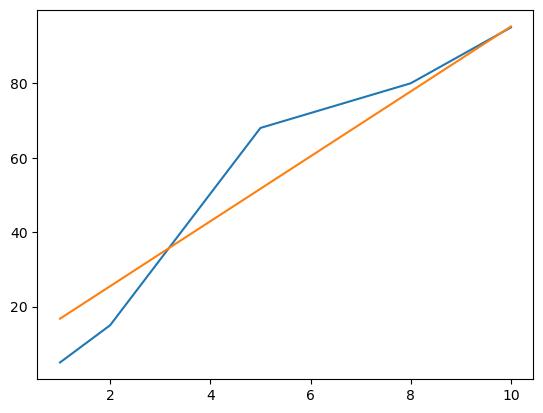

In [101]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)  # 2차원데이터를 1차원으로
plt.plot(x_data, y_hat)
plt.show()

In [105]:
x_data, x_data[:, 0], x_data.ravel(),   # 2차원, 1차원

(array([[ 1],
        [ 2],
        [ 5],
        [ 8],
        [10]]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]))

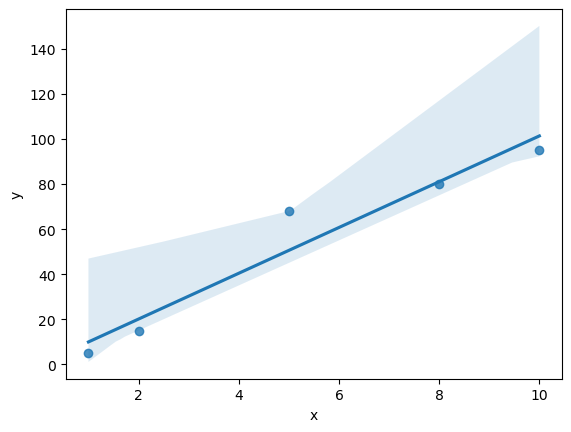

In [106]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x' : x_data[:, 0], 'y' : y_data[:, 0]})
sns.regplot(data=df, x='x', y='y')
# 신뢰구간이 많은 곳은 넓게 그려짐
plt.show()

In [109]:
# 라이브러리를 사용하지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])     # 독립변수(1차원)
y_data = np.array([5, 15, 68, 80, 95])  # 종속변수(1차원)
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
print(scaled_x_data)
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
print(scaled_y_data)

[-1.22474487 -0.93313895 -0.05832118  0.81649658  1.39970842]
[-1.32373476 -1.04563922  0.42826713  0.76198177  1.17912508]


In [122]:
# 라이브러리를 사용해서 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)     # 독립변수(1차원)  # reshape(-1, 1) - 행:-1개만큼 열:고정
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)  # 종속변수(1차원)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()  # x_data를 표준화할 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = StandardScaler()  # y_data를 표준화할 객체
scaler_y.fit(y_data)
scaler_y_data = scaler_y.transform(y_data)
print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [124]:
# placeholder 설정 : predict 가능하도록 하기 위함
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# weight & bias 변수 설정
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis 가설
H = W*x + b

# cost function(loss function) : 손실함수
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train     = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict={x : scaled_x_data, y : scaled_y_data})
    if step%1000 == 1:
        print('{}/10000번째 cost : {}, W : {}, b : {}'.format(step, cost_val, W_val, b_val))

1/10000번째 cost : 3.28338623046875, W : [-1.5043446], b : [-0.10587346]
1001/10000번째 cost : 1.0416545867919922, W : [-0.20318353], b : [-0.01429979]
2001/10000번째 cost : 1.0007599592208862, W : [-0.02744286], b : [-0.0019314]
3001/10000번째 cost : 1.000013828277588, W : [-0.00370656], b : [-0.00026088]
4001/10000번째 cost : 1.0000001192092896, W : [-0.00050063], b : [-3.5247987e-05]
5001/10000번째 cost : 1.0, W : [-6.7616435e-05], b : [-4.7730587e-06]
6001/10000번째 cost : 1.0000001192092896, W : [-9.132666e-06], b : [-6.5826725e-07]
7001/10000번째 cost : 1.0000001192092896, W : [-1.2332349e-06], b : [-1.0193162e-07]
8001/10000번째 cost : 1.0, W : [-1.6385336e-07], b : [-2.8714556e-08]
9001/10000번째 cost : 1.0, W : [-3.4044277e-08], b : [-7.167437e-09]


## 2.5 독립변수 x가 여러개인 linear Regression

In [11]:
# data set
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],[185],[180],[196],[142]])

# tensor groph 정의 placeholder : 공간을만들어줌
# shape=[None, 3] : x_data[5, 3] 도 받고, 예측할때는 [1, 3] 3열만 고정
# dtype=tf.float32 : 타입지정
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)  
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# weight & bias (weight(독립변수) 3개, bias(종속변수) 1개)
W = tf.Variable(tf.random_normal([3, 1]), name='weight') # name='weight' 이름지정 사용하지않아도 구동이된다
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis : 가설을 만듦
# H = X@W + b : tf.matmul(X, W) = 행렬의 곱
H = tf.matmul(X, W) + b

# cost
# tf.reduce_mean 평균
# tf.square 제곱
cost = tf.reduce_mean(tf.square(H-Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

# session 생성과 variable(변수) 초기화 
# (tf.global_variables_initializer() : 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
# feed_dict 빈공간에 값을 지정
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost],
                          feed_dict={X : x_data,
                                    Y : y_data})
    if step%5000==1:
        print(f'{step}번째 cost:{cost_val}')
print(f'최종 cost:{cost_val}')

1번째 cost:66505.3125
5001번째 cost:0.9417966604232788
10001번째 cost:0.20492061972618103
15001번째 cost:0.15395542979240417
20001번째 cost:0.1490488052368164
25001번째 cost:0.14753912389278412
30001번째 cost:0.14650200307369232
35001번째 cost:0.14568360149860382
최종 cost:0.14503918588161469


In [15]:
# 예측
sess.run(H, feed_dict={X : np.array([[73,80,77],
                                    [73,80,72]])}) # 2차원 넘파이배열

array([[152.60231],
       [149.92883]], dtype=float32)

## csv를 array로 읽어오기

In [79]:
# 방법1 : csv -> 데이터프레임 -> 넘파이배열
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
# data.fillna(value=data.mean(), inplace=True) # 결측치 대체
data.dropna(how='any', axis=0, inplace=True)
x = data[['Solar.R', 'Wind', 'Temp']].values
y = data['Ozone'].values
x.shape, y.shape

((111, 3), (111,))

In [16]:
# 방법2 : csv -> 넘파일배열
# data = np.loadtxt('data/ozone_nonan.csv', delimiter=',') NAN과 header가 없어야 함
data = np.genfromtxt('data/ozone.csv', delimiter=',', skip_header=1,
                    missing_values='NA', filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [59]:
# csv파일 -> 데이터프레임 -> 결측치처리 -> 넘파이 배열 -> 머신러닝 
# import statsmodels.api as sm
# sm.datasets.get_rdataset('airquality').data 와 동일
data = pd.read_csv('data/ozone.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [25]:
# 결측치 처리 방법 1 : 결측치 행을 제거
# how='any' : 열에 결측치가있으면 지움
data.dropna(how='any') # axis=0 : 기본값 생략가능. 결측치가 한열이라도 있는 행 삭제

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [27]:
# 결측치 처리 방법 2 : 열별 평균 값으로 대체
data.fillna(value=data.mean())

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26
149,42.12931,145.000000,13.2,77,9,27
150,14.00000,191.000000,14.3,75,9,28
151,18.00000,131.000000,8.0,76,9,29


In [31]:
# 결측치 처리 방법 3 : 열별 월별 평균 값으로 대체
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
mean_data.loc[5, 'Ozone']

23.615384615384617

In [60]:
def fill_nan(row):
    'row["Ozone"]과 row["Solar.R"]값이 결측치면 mean_data.loc[월, 열이름] 평균값으로 대체'
    row = row.copy()
    # pd.options.mode.copy_on_write = True
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R'] :
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# data.loc[4], fill_nan(data.loc[4])
data = data.apply(fill_nan, axis=1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
data.head()

,Ozone,Solar.R,Wind,Temp
0,41.000000,190.000000,7.4,67.0
1,36.000000,118.000000,8.0,72.0
2,12.000000,149.000000,12.6,74.0
3,18.000000,313.000000,11.5,62.0
4,23.615385,181.296296,14.3,56.0


In [74]:
# 독립변수 & 종속변수 (values : 판다스 데이터를 넘파이 배열로 )
x_data = data[['Solar.R', 'Wind', 'Temp']].values
x_data = data.iloc[:, 1:].values
y_data = data['Ozone'].values.reshape(-1, 1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

# 3. Hypothesis 예측
H = tf.matmul(X, W) + b

# 4. cost함수 = loss함수 = 손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-6).minimize(cost)

# 6. sess객체 생성 & W,b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data, y : y_data})
    
    if step%2000 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}, W : {}, b : {}'.format(cost_val, sess.run(W), sess.run(b)))     

1번째 cost : 24871.310546875
2001번째 cost : 711.0797119140625
4001번째 cost : 678.5676879882812
6001번째 cost : 650.6194458007812
8001번째 cost : 626.2763061523438
10001번째 cost : 605.0730590820312
12001번째 cost : 586.6046142578125
14001번째 cost : 570.518310546875
16001번째 cost : 556.5066528320312
18001번째 cost : 544.3021850585938
20001번째 cost : 533.6717529296875
22001번째 cost : 524.412353515625
24001번째 cost : 516.3470458984375
26001번째 cost : 509.3218994140625
28001번째 cost : 503.2027587890625
30001번째 cost : 497.8726501464844
32001번째 cost : 493.22991943359375
34001번째 cost : 489.18585205078125
36001번째 cost : 485.66314697265625
38001번째 cost : 482.5945739746094
최종 cost : 479.9230041503906, W : [[ 0.05329285]
 [-2.5698807 ]
 [ 0.7423933 ]], b : [-0.48333976]


In [75]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마 ?)
input_data = np.array([[118,8,72]])
sess.run(H, feed_dict={X:input_data})

array([[38.69849]], dtype=float32)

In [88]:
# MinMaxScaler 나 StandardScaler를 이용하여 스케일 조정 후 tensorflow 수행
# 주로 0~1 사이     주로 0근처
data = pd.read_csv('data/ozone.csv')

# 결측치 처리
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
def fill_nan(row):
    'row["Ozone"]과 row["Solar.R"]값이 결측치면 mean_data.loc[월, 열이름] 평균값으로 대체'
    row = row.copy()
    # pd.options.mode.copy_on_write = True
    if row.isna()['Ozone'] :
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R'] :
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# data.loc[4], fill_nan(data.loc[4])
data = data.apply(fill_nan, axis=1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]

# 독립변수 & 종속변수 (values: 판다스 데이터를 넘파이 배열로)
x_data = data.iloc[:, 1:].values
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

# 독립변수와 종속변수의 scale 조정
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaled_x_data =scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
scaled_x_data.shape, scaled_y_data.shape

# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

# 3. Hypothesis 예측
H = tf.matmul(X, W) + b

# 4. cost함수 = loss함수 = 손실함수
cost = tf.reduce_mean(tf.square(H-y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. sess객체 생성 & W,b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 100001):
    _, cost_val = sess.run([train, cost], feed_dict={X : scaled_x_data, y : scaled_y_data})
    
    if step%10000 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))   

1번째 cost : 6.0487260818481445
10001번째 cost : 3.599811315536499
20001번째 cost : 2.2455999851226807
30001번째 cost : 1.4920316934585571
40001번째 cost : 1.069584608078003
50001번째 cost : 0.8307232856750488
60001번째 cost : 0.6943413019180298
70001번째 cost : 0.6156104803085327
80001번째 cost : 0.5696148872375488
90001번째 cost : 0.5423953533172607
최종 cost : 0.5260714888572693


In [89]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마 ?)
input_data = np.array([[118,8,72]])
predict_data = sess.run(H, feed_dict={X: scaler_x.transform(input_data)})
scaler_y.inverse_transform(predict_data)

array([[37.84676]], dtype=float32)

# 3. logistic Regression = Binary classification(Binary 분류분석)
- logistic 회귀분석 : 기존의 회귀분석과는 다른 처리가 필요

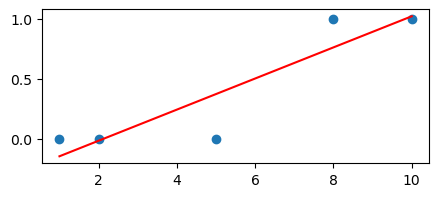

In [97]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 2))
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1])
lm = stats.linregress(x, y)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H,'r')
plt.show()

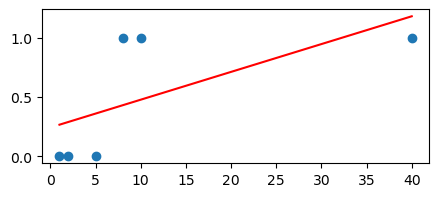

In [98]:
plt.figure(figsize=(5, 2))
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1])
lm = stats.linregress(x, y)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H,'r')
plt.show()

In [117]:
# 교안 50pt
x_data = np.array([[10, 0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])

# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 독립변수가 2개, 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                    y : y_data})
    if step%600 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 1.2789642810821533
601번째 cost : 0.3902711868286133
1201번째 cost : 0.3379004895687103
1801번째 cost : 0.30717772245407104
2401번째 cost : 0.2853761911392212
3001번째 cost : 0.2689181864261627
3601번째 cost : 0.25592419505119324
4201번째 cost : 0.24529896676540375
4801번째 cost : 0.2363652139902115
5401번째 cost : 0.2286834716796875
6001번째 cost : 0.22195637226104736
6601번째 cost : 0.21597589552402496
7201번째 cost : 0.21059219539165497
7801번째 cost : 0.2056943029165268
8401번째 cost : 0.20119835436344147
9001번째 cost : 0.19703984260559082
9601번째 cost : 0.19316808879375458
최종 cost : 0.1907319575548172


In [123]:
# accuracy
predict = tf.cast(H >= 0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X : x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict={X : x_data, y :y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('모델의 정확도 :', sess.run(accuracy, feed_dict={X:x_data, y:y_data})*100, '%')

모델의 정확도 : 85.71428656578064 %


In [124]:
# 모델 사용하기 == 예측하기
input_data = np.array([[10, 3]])
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

# 4. 분류분석
- 종속변수가 2개 이상
- 교안 54pt

In [135]:
x_data = np.array([[10,7, 8, 5],
                   [8, 8, 9, 4],
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])

# 종속변수가 다중분류면 원핫인코딩(교안 58pt)
# 원핫인코딩 방법 1
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# to_categorical(y_data)
encoder = LabelEncoder()
encoder.fit(y_data.ravel())
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = to_categorical(labeled_y_data)
onehot_y_data
    
# 원핫인코딩 방법 2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder = LabelEncoder()
encoder.fit(y_data.ravel())
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = pd.get_dummies(labeled_y_data).values # pd.get_dummies의 결과 데이터프레임
onehot_y_data

# 원핫인코딩 방법 3
onehot_y_data = pd.get_dummies(y_data.ravel()).values
x_data.shape, onehot_y_data.shape

((7, 4), (7, 3))

In [136]:
x_data # 독립변수

array([ 1,  2,  5,  8, 10, 40])

In [137]:
onehot_y_data # 종속변수

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [146]:
# X, y
X = tf.placeholder(shape=[None, 4], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 3], dtype=tf.float32)

# 독립변수가 4개, 종속변수가 3개인 weight & bias
W = tf.Variable(tf.random_normal([4,3]))
b = tf.Variable(tf.random.normal([3]))

# Hypothesis
logits = tf.matmul(X, W) + b
# H = tf.sigmoid(logits) binary classfication(이진분류) 일 경우
H = tf.nn.softmax(logits) # softmax : 종속변수들의 합이 1

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                    Y : onehot_y_data})
    if step%600 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 10.6384916305542
601번째 cost : 1.619059681892395
1201번째 cost : 1.0556663274765015
1801번째 cost : 0.506774365901947
2401번째 cost : 0.04425957426428795
3001번째 cost : 0.03881866857409477
3601번째 cost : 0.03488437086343765
4201번째 cost : 0.031777363270521164
4801번째 cost : 0.029218649491667747
5401번째 cost : 0.027058351784944534
6001번째 cost : 0.02520299330353737
6601번째 cost : 0.02358914352953434
7201번째 cost : 0.022170865908265114
7801번째 cost : 0.020913908258080482
8401번째 cost : 0.01979169249534607
9001번째 cost : 0.01878361590206623
9601번째 cost : 0.017872853204607964
최종 cost : 0.017314260825514793


In [147]:
# 예측하기
input_data = np.array([[10, 7, 8, 5]])
y_hat = sess.run(H, feed_dict={X : input_data})
print(y_hat)
print(y_hat.argmax(axis=1)) # argmax(axis=1) : 행별 최대값이 있는 index

[[9.6782780e-01 3.2172166e-02 1.4778205e-11]]
[0]


In [152]:
# accuracy 측정
# H(예측값) : 0.99 0.005 0.005 -> H.argmax -> 0
# Y(실제값) :  1     0     0   -> Y.argmax -> 0
predict = tf.argmax(H, axis=1)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, tf.argmax(Y, axis=1))
# sess.run(correct, feed_dict={X:x_data, Y:onehot_y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy, feed_dict={X:x_data,
                             Y:onehot_y_data})*100, '%')

100.0 %


# 5. XOR(교안 77pt)

In [157]:
# dataset
x_data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
y_data = np.array([[0], 
                   [1],
                   [1], 
                   [0]])

# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 독립변수가 2개, 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random.normal([1]))

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                    y : y_data})
    if step%600 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 0.7215084433555603
601번째 cost : 0.7093347311019897
1201번째 cost : 0.703235387802124
1801번째 cost : 0.6994356513023376
2401번째 cost : 0.6970652341842651
3001번째 cost : 0.6955881714820862
3601번째 cost : 0.694668173789978
4201번째 cost : 0.6940951943397522
4801번째 cost : 0.6937382221221924
5401번째 cost : 0.6935157775878906
6001번째 cost : 0.6933771371841431
6601번째 cost : 0.693290650844574
7201번째 cost : 0.6932367086410522
7801번째 cost : 0.6932030916213989
8401번째 cost : 0.693182110786438
9001번째 cost : 0.6931689977645874
9601번째 cost : 0.6931607723236084
최종 cost : 0.6931571364402771


In [160]:
# accaccuracy 
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data,
                             y:y_data})

0.75

# 6. Deep Learning XOR 예제

In [167]:
# dataset
x_data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
y_data = np.array([[0], 
                   [1], 
                   [1], 
                   [0]])

# X ,y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력4)
W1 = tf.Variable(tf.random.normal([2, 4]), name='weight1')
b1 = tf.Variable(tf.random.normal([4]), name='bias1')
# logits = tf.matmul(X, W1)+b1
# H1 = tf.sigmoid(logits)
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)  # H1 == layer1

# layer2의 weight & bias (layer2 = 입력4, 출력1) : 마지막 출력층
W2 = tf.Variable(tf.random.normal([4, 1]))
b2 = tf.Variable(tf.random.normal([1]))
# hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                    y : y_data})
    if step%600 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 1.2850582599639893
601번째 cost : 0.5730627179145813
1201번째 cost : 0.44972801208496094
1801번째 cost : 0.4006842076778412
2401번째 cost : 0.3802121877670288
3001번째 cost : 0.37132731080055237
3601번째 cost : 0.36570292711257935
4201번째 cost : 0.3619510233402252
4801번째 cost : 0.35929885506629944
5401번째 cost : 0.3573051691055298
6001번째 cost : 0.35578110814094543
6601번째 cost : 0.3546251654624939
7201번째 cost : 0.3537081480026245
7801번째 cost : 0.3529855012893677
8401번째 cost : 0.3523433804512024
9001번째 cost : 0.35181790590286255
9601번째 cost : 0.3513742685317993
최종 cost : 0.35111743211746216


In [168]:
# accaccuracy 
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data,
                             y:y_data})

0.75

## layer 층을 x2 -> 10 -> 20 -> 10 -> y1
                    입력층        hidden layer           출력층 

In [170]:
# dataset
x_data = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
y_data = np.array([[0], 
                   [1], 
                   [1], 
                   [0]])

# X ,y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력10)
W1 = tf.Variable(tf.random.normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random.normal([10]), name='bias1')
# logits = tf.matmul(X, W1)+b1
# H1 = tf.sigmoid(logits)
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)  # H1 == layer1

# layer2의 weight & bias (layer2 = 입력10, 출력20) : 마지막 출력층
W2 = tf.Variable(tf.random.normal([10, 20]))
b2 = tf.Variable(tf.random.normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

#layer3 weight & bias (layer3 = 입력 20, 출력 10)
W3 = tf.Variable(tf.random.normal([20, 10]))
b3 = tf.Variable(tf.random.normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

#layer34 weight & bias (최종출력층 layer4 = 입력 10, 출력 1)
W4 = tf.Variable(tf.random.normal([10, 1]))
b4 = tf.Variable(tf.random.normal([1]))
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X : x_data,
                                                    y : y_data})
    if step%600 == 1:
        print('{}번째 cost : {}'.format(step, cost_val))
print('최종 cost : {}'.format(cost_val))

1번째 cost : 4.8697967529296875
601번째 cost : 0.008765868842601776
1201번째 cost : 0.0038934124168008566
1801번째 cost : 0.0024554019328206778
2401번째 cost : 0.0017855062615126371
3001번째 cost : 0.0013901344500482082
3601번째 cost : 0.0011301117483526468
4201번째 cost : 0.0009471392259001732
4801번째 cost : 0.0008127662586048245
5401번째 cost : 0.0007097889902070165
6001번째 cost : 0.0006283958209678531
6601번째 cost : 0.0005624956102110445
7201번째 cost : 0.0005083518335595727
7801번째 cost : 0.00046304240822792053
8401번째 cost : 0.00042468574247322977
9001번째 cost : 0.00039170176023617387
9601번째 cost : 0.0003632149309851229
최종 cost : 0.00034627720015123487


In [171]:
# accaccuracy 
predict = tf.cast(H>=0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:x_data, y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data,
                             y:y_data})

1.0